### Import Libraries

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
import xlrd
from pathlib import Path
%matplotlib inline
import re


### Data Reading And Understanding

In [2]:
# Promotion Table
df = pd.read_excel('Diabetic Retinopathy Screening.xlsx')
df.head()

,Eye Clinic No.,Last Name,Gender,Review Date,Age,Diagnosed Year,OD VA(Corrected),OS VA(Corrected),OD Retinopathy,OS Retinopathy,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,2005,SUWARNA DR,F,2020-01-16 00:00:00,60,2010,(6/8),-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2109,PIYADARSHANI RDD,F,2020-01-17 00:00:00,51,2010,(6/12),(6/9),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6220,PERERA AN,F,2020-01-07 00:00:00,50,2015,(6/6),(6/6-),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001,MOHOTTI S,F,NaN,67,1999,6/6-,6/6-,N3,N2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0005,Kanthi P.S,F,2019-04-30 00:00:00,60,2018,6/12,6/6-,N0,N0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Eye Clinic No.', 'Last Name', 'Gender', 'Review Date', 'Age',
       'Diagnosed Year', 'OD VA(Corrected)', 'OS VA(Corrected)',
       'OD Retinopathy', 'OS Retinopathy', 'OD Maculopathy', 'OS Maculopathy',
       'OD Other findings', 'OS Other findings', 'Intervention', 'Next Review',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

### Data Cleaning And Preparation

In [4]:
#Dropping columns we do not require in the analysis.

df.drop(['Review Date','OD Other findings', 'OS Other findings','Intervention','Next Review','OD Maculopathy',
         'OS Maculopathy','Last Name','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29'], axis = 1, inplace = True)

In [5]:
df.columns

Index(['Eye Clinic No.', 'Gender', 'Age', 'Diagnosed Year', 'OD VA(Corrected)',
       'OS VA(Corrected)', 'OD Retinopathy', 'OS Retinopathy'],
      dtype='object')

In [6]:
# changing columns with rename() 
# Need to remove name spaces in the columns

df = df.rename(columns = {"Eye Clinic No.": "Eye_Clinic_No", 
                            "Diagnosed Year":"Diagnosed_Year", 
                            "OD VA(Corrected)": "Right_VA",
                         "OS VA(Corrected)": "Left_VA",
                          "OD Retinopathy":"Right_Retinopathy",
                          "OS Retinopathy":"Left_Retinopathy"}) 

In [7]:
df.columns

Index(['Eye_Clinic_No', 'Gender', 'Age', 'Diagnosed_Year', 'Right_VA',
       'Left_VA', 'Right_Retinopathy', 'Left_Retinopathy'],
      dtype='object')

In [8]:
df.replace(r'^\s+$', np.nan, regex=True, inplace = True)
df.replace('\\N', np.nan, inplace = True)

In [9]:
# Let's take a look at the statistical info of the dataset
df.describe()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
count,1810,1804,1805,1799,1784,1746,1520,1522
unique,1708,6,63,44,65,71,15,19
top,1615,F,59,2009,6/6,6/6,N0,N0
freq,4,1179,86,188,306,300,896,885


In [10]:
df.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
0,2005,F,60,2010,(6/8),-,NaN,NaN
1,2109,F,51,2010,(6/12),(6/9),NaN,NaN
2,6220,F,50,2015,(6/6),(6/6-),NaN,NaN
3,0001,F,67,1999,6/6-,6/6-,N3,N2
4,0005,F,60,2018,6/12,6/6-,N0,N0


In [11]:
# Get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 8 columns):
Eye_Clinic_No        1810 non-null object
Gender               1804 non-null object
Age                  1805 non-null object
Diagnosed_Year       1799 non-null object
Right_VA             1784 non-null object
Left_VA              1746 non-null object
Right_Retinopathy    1520 non-null object
Left_Retinopathy     1522 non-null object
dtypes: object(8)
memory usage: 113.7+ KB


In [12]:
# let's check the null percentage for each column
round(100*(df.isnull().sum()/len(df.index)), 2)

Eye_Clinic_No         0.44
Gender                0.77
Age                   0.72
Diagnosed_Year        1.05
Right_VA              1.87
Left_VA               3.96
Right_Retinopathy    16.39
Left_Retinopathy     16.28
dtype: float64

##### Clean column Right_Retinopathy

In [13]:
# Check the unique values in OD_Retinopathy
df.Right_Retinopathy.unique()

array([nan, 'N3', 'N0', '-', 'N1', 'P3', 'N2', 'P1', 'P2', 'N4', 'NI',
       'P4', 'CATARACT', 'OD Retinopathy', 'P0', 'n0'], dtype=object)

In [14]:
array = ['N0', 'N1','N2','N3','N4','P1','P2','P3']
df_OD = df.loc[df['Right_Retinopathy'].isin(array)]
df_OD.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
3,0001,F,67,1999,6/6-,6/6-,N3,N2
4,0005,F,60,2018,6/12,6/6-,N0,N0
5,0027,F,57,2017,6/6,6/6,N0,N0
6,0028,M,70,2004,NaN,NaN,N0,N0
10,0034,M,66,1989,NaN,NaN,N1,N1


In [15]:
# Check the unique values in OD_Retinopathy
df_OD.Right_Retinopathy.unique()

array(['N3', 'N0', 'N1', 'P3', 'N2', 'P1', 'P2', 'N4'], dtype=object)

In [16]:
#replace values with a proper value

df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('N0', 'No_DR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('N1', 'Mild_DR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('N2', 'Moderate_DR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('N3', 'Severe_DR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('N4', 'Severe_DR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('P1', 'PDR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('P2', 'PDR')
df_OD['Right_Retinopathy'] = df_OD['Right_Retinopathy'].str.replace('P3', 'PDR')


C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [17]:
# Check the unique values in OD_Retinopathy
df_OD.Right_Retinopathy.unique()

array(['Severe_DR', 'No_DR', 'Mild_DR', 'PDR', 'Moderate_DR'],
      dtype=object)

##### Clean column Left_Retinopathy

In [18]:
# Check the unique values in OS_Retinopathy
df_OD.Left_Retinopathy.unique()

array(['N2', 'N0', 'N1', 'P3', 'N3', 'P1', '-', 'NO', 'P2', 'N4', 'p3',
       'M0', 'M3', 'M1', 'M2'], dtype=object)

In [19]:
array = ['N0', 'N1','N2','N3','N4','P1','P2','P3']
df_OS = df_OD.loc[df_OD['Left_Retinopathy'].isin(array)]
df_OS.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
3,0001,F,67,1999,6/6-,6/6-,Severe_DR,N2
4,0005,F,60,2018,6/12,6/6-,No_DR,N0
5,0027,F,57,2017,6/6,6/6,No_DR,N0
6,0028,M,70,2004,NaN,NaN,No_DR,N0
10,0034,M,66,1989,NaN,NaN,Mild_DR,N1


In [20]:
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('N0', 'No_DR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('N1', 'Mild_DR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('N2', 'Moderate_DR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('N3', 'Severe_DR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('N4', 'Severe_DR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('P1', 'PDR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('P2', 'PDR')
df_OS['Left_Retinopathy'] = df_OS['Left_Retinopathy'].str.replace('P3', 'PDR')


C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [21]:
# Check the unique values in OS_Retinopathy
df_OS.Left_Retinopathy.unique()

array(['Moderate_DR', 'No_DR', 'Mild_DR', 'PDR', 'Severe_DR'],
      dtype=object)

##### Clean column Gender

In [22]:
# Check the unique values in Gender
df_OS.Gender.unique()

array(['F', 'M', nan, 'E', 'f', 'm'], dtype=object)

In [23]:
df_OS.Gender.value_counts()

F    749
M    376
f      3
m      2
E      1
Name: Gender, dtype: int64

In [24]:
#take only relevent rows

array = ['F','M']
df_Gender = df_OS.loc[df_OS['Gender'].isin(array)]
df_Gender.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
3,0001,F,67,1999,6/6-,6/6-,Severe_DR,Moderate_DR
4,0005,F,60,2018,6/12,6/6-,No_DR,No_DR
5,0027,F,57,2017,6/6,6/6,No_DR,No_DR
6,0028,M,70,2004,NaN,NaN,No_DR,No_DR
10,0034,M,66,1989,NaN,NaN,Mild_DR,Mild_DR


In [25]:
#replace values with a proper value

df_Gender['Gender'] = df_Gender['Gender'].str.replace('M', '1')
df_Gender['Gender'] = df_Gender['Gender'].str.replace('F', '0')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df_Gender.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
3,0001,0,67,1999,6/6-,6/6-,Severe_DR,Moderate_DR
4,0005,0,60,2018,6/12,6/6-,No_DR,No_DR
5,0027,0,57,2017,6/6,6/6,No_DR,No_DR
6,0028,1,70,2004,NaN,NaN,No_DR,No_DR
10,0034,1,66,1989,NaN,NaN,Mild_DR,Mild_DR


In [27]:
#Convert to  int data type

df_Gender['Gender'] = df_Gender['Gender'].astype(int)

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Clean column Diagnosed_Year

In [28]:
# Check the unique values in Diagnosed_Year
df_Gender.Diagnosed_Year.unique()

array([1999, 2018, 2017, 2004, 1989, 2003, 2016, 2009, 2011, 1993, 2014,
       nan, 2012, 2019, 2000, 2007, 2015, 2008, 2013, 2010, 1995, 2005,
       1990, 2006, 1006, 2002, 2001, 1998, 1994, '6/18', 1996, 1997, 1981,
       1992, 1984, 1019, 1985, 1986, 1991, 5014, '(6/6)'], dtype=object)

In [29]:
#extract relevent rows

array = [1999, 2018, 2017, 2004, 1989, 2003, 2016, 2009, 2011, 1993, 2014,
       2012, 2019, 2000, 2007, 2015, 2008, 2013, 2010, 1995, 2005,
       1990, 2006, 2002, 2001, 1998, 1994, 1996, 1997, 1981,
       1992, 1984, 1019, 1985, 1986, 1991]

df_Year = df_Gender.loc[df_Gender['Diagnosed_Year'].isin(array)]
df_Year.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy
3,0001,0,67,1999,6/6-,6/6-,Severe_DR,Moderate_DR
4,0005,0,60,2018,6/12,6/6-,No_DR,No_DR
5,0027,0,57,2017,6/6,6/6,No_DR,No_DR
6,0028,1,70,2004,NaN,NaN,No_DR,No_DR
10,0034,1,66,1989,NaN,NaN,Mild_DR,Mild_DR


In [30]:
df_Year['Diagnosed_Year'] = df_Year['Diagnosed_Year'].astype(int)

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#Calculate the year difference

df_Year['DiagnosedYears'] =  2020 - df_Year['Diagnosed_Year']

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_Year.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy,DiagnosedYears
3,0001,0,67,1999,6/6-,6/6-,Severe_DR,Moderate_DR,21
4,0005,0,60,2018,6/12,6/6-,No_DR,No_DR,2
5,0027,0,57,2017,6/6,6/6,No_DR,No_DR,3
6,0028,1,70,2004,NaN,NaN,No_DR,No_DR,16
10,0034,1,66,1989,NaN,NaN,Mild_DR,Mild_DR,31


##### Clean column Right_VA

In [33]:
# Check the unique values in OD_VA
df_Year.Right_VA.unique()

array(['6/6-', '6/12', '6/6', nan, '6/36', '6/9-', '6/18', '6/24',
       '(6/9+)', '6/12(-)', '6/9', '6/6(-)', '1/60', '6/60', '2/60',
       '6/12+', '6/12-', 'HM', '3/60', '6/9+', '(6/6)', '(6/6-)', '6/24-',
       '6/18+', '6/36+', '6/12=', '6/18-', '6/24+', '(6/9)', '6/60+',
       '6/36-', '(6/18+)', '6/6/', '(3/60)', '(6/12)', '(6/24)', '(6/18)',
       '(6/9-)', '(1/60)', '(2/60)', '(6/12+)', '(6/36+)', '(6/24-)',
       '(6/6) ', '(6/36)', '(6/12-)', '(6/18-)', '(6/36-)', '6/18 +',
       '6/18+_', '(6/24+)'], dtype=object)

In [34]:
df_Year['Right_VA'] = df_Year['Right_VA'].str.replace('[=+_()-]', '')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
# Check the unique values in OD_VA
df_Year.Right_VA.unique()

array(['6/6', '6/12', nan, '6/36', '6/9', '6/18', '6/24', '1/60', '6/60',
       '2/60', 'HM', '3/60', '6/6/', '6/6 ', '6/18 '], dtype=object)

In [36]:
df_Year['Right_VA'] = df_Year['Right_VA'].str.replace(" ", "")

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
# Check the unique values in OD_VA
df_Year.Right_VA.unique()

array(['6/6', '6/12', nan, '6/36', '6/9', '6/18', '6/24', '1/60', '6/60',
       '2/60', 'HM', '3/60', '6/6/'], dtype=object)

In [38]:
df_Year['Right_VA'] = df_Year['Right_VA'].str.replace('6/6/', '6/6')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_Year['Right_VA'] = df_Year['Right_VA'].str.replace('6/60', '1')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
# Check the unique values in OD_VA
df_Year.Right_VA.unique()

array(['6/6', '6/12', nan, '6/36', '6/9', '6/18', '6/24', '1/60', '1',
       '2/60', 'HM', '3/60'], dtype=object)

In [41]:
array = ['6/6', '6/12', '6/36', '6/9', '6/18', '6/24', '1/60', '1',
       '2/60', '3/60']

df_OD_VA = df_Year.loc[df_Year['Right_VA'].isin(array)]
df_OD_VA.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy,DiagnosedYears
3,0001,0,67,1999,6/6,6/6-,Severe_DR,Moderate_DR,21
4,0005,0,60,2018,6/12,6/6-,No_DR,No_DR,2
5,0027,0,57,2017,6/6,6/6,No_DR,No_DR,3
12,0036,0,70,2003,6/36,6/12+,PDR,PDR,17
14,0039,0,66,2009,6/9,6/9-,No_DR,No_DR,11


In [42]:
# Check the unique values in OD_VA
df_OD_VA.Right_VA.unique()

array(['6/6', '6/12', '6/36', '6/9', '6/18', '6/24', '1/60', '1', '2/60',
       '3/60'], dtype=object)

In [43]:
#replace values with a proper value

df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/6', '0.0')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/12', '0.30')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/36', '0.78')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/9', '0.18')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/18', '0.48')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('6/24', '0.60')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('1/60', '1.78')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('2/60', '1.48')
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].str.replace('3/60', '1.30')


C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [44]:
# Check the unique values in OD_VA
df_OD_VA.Right_VA.unique()

array(['0.0', '0.30', '0.78', '0.18', '0.48', '0.60', '1.78', '1', '1.48',
       '1.30'], dtype=object)

In [45]:
df_OD_VA['Right_VA'] = df_OD_VA['Right_VA'].astype(float)

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
# Check the unique values in OD_VA
df_OD_VA.Right_VA.unique()

array([0.  , 0.3 , 0.78, 0.18, 0.48, 0.6 , 1.78, 1.  , 1.48, 1.3 ])

In [47]:
df_OD_VA.dtypes

Eye_Clinic_No         object
Gender                 int32
Age                   object
Diagnosed_Year         int32
Right_VA             float64
Left_VA               object
Right_Retinopathy     object
Left_Retinopathy      object
DiagnosedYears         int32
dtype: object

##### Clean column Left_VA

In [48]:
# Check the unique values in OS_VA
df_OD_VA.Left_VA.unique()

array(['6/6-', '6/6', '6/12+', '6/9-', '6/24', '6/12', '6/18(+)', '6/60',
       '(6/12-)', '6/9', '6/9(-)', '6/6(-)', '6/24+', '6/12-', '6/18',
       '6/36-', '6/9+', '(6/6)', '(6/6-)', nan, '2/60', '6/36', '6/24-',
       '(6/9+)', '6/18+', '1/60', '6/36+', '6/18-', '3/60', '(6/9-)',
       'N0', '(6/24+)', 'HM', '(6/18)', '(6/9)', '(6/36)', '6/9-)',
       '6/9)', '(4/60)', '(6/9+) ', '(6/12)', '(6/18-)', '(6/12+)',
       '(6/24)', '(6/60)', '(2/60)', '(', '(6/18+)', '(6/', '(1/60)',
       "(6'/6)", '(6/24-)', '(3/60)'], dtype=object)

In [49]:
df_OD_VA['Left_VA'] = df_OD_VA['Left_VA'].str.replace('[=+_()-]', '')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_OD_VA['Left_VA'] = df_OD_VA['Left_VA'].str.replace(" ", "")

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
# Check the unique values in OS_VA
df_OD_VA.Left_VA.unique()

array(['6/6', '6/12', '6/9', '6/24', '6/18', '6/60', '6/36', nan, '2/60',
       '1/60', '3/60', 'N0', 'HM', '4/60', '', '6/', "6'/6"], dtype=object)

In [52]:
array = ['6/6', '6/12', '6/9', '6/24', '6/18', '6/60', '6/36', '2/60',
       '1/60', '3/60', '4/60', "6'/6"]

df_OS_VA = df_OD_VA.loc[df_OD_VA['Left_VA'].isin(array)]
df_OS_VA.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy,DiagnosedYears
3,0001,0,67,1999,0.00,6/6,Severe_DR,Moderate_DR,21
4,0005,0,60,2018,0.30,6/6,No_DR,No_DR,2
5,0027,0,57,2017,0.00,6/6,No_DR,No_DR,3
12,0036,0,70,2003,0.78,6/12,PDR,PDR,17
14,0039,0,66,2009,0.18,6/9,No_DR,No_DR,11


In [53]:
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace("6'/6", '6/6')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
# Check the unique values in OS_VA
df_OS_VA.Left_VA.unique()

array(['6/6', '6/12', '6/9', '6/24', '6/18', '6/60', '6/36', '2/60',
       '1/60', '3/60', '4/60'], dtype=object)

In [55]:
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/60', '1')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
#replace values with a proper value

df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/6', '0.0')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/12', '0.30')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/9', '0.18')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/24', '0.60')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/18', '0.48')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('6/36', '0.78')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('2/60', '1.48')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('1/60', '1.78')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('3/60', '1.30')
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].str.replace('4/60', '1.18')


C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [57]:
# Check the unique values in OS_VA
df_OS_VA.Left_VA.unique()

array(['0.0', '0.30', '0.18', '0.60', '0.48', '1', '0.78', '1.48', '1.78',
       '1.30', '1.18'], dtype=object)

In [58]:
df_OS_VA['Left_VA'] = df_OS_VA['Left_VA'].astype(float)

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_OS_VA.dtypes

Eye_Clinic_No         object
Gender                 int32
Age                   object
Diagnosed_Year         int32
Right_VA             float64
Left_VA              float64
Right_Retinopathy     object
Left_Retinopathy      object
DiagnosedYears         int32
dtype: object

##### Clean column Age

In [60]:
# Check the unique values in OS_VA
df_OS_VA.Age.unique()

array([67, 60, 57, 70, 66, 69, 56, 49, 37, 59, 27, 71, 75, 52, 62, 58, 47,
       73, 63, 79, 78, 42, 65, 43, 72, 48, 54, 36, 40, 76, nan, 53, 39,
       68, 61, 51, 77, 50, 64, 41, 88, 80, 74, 55, 44, 38, 81, 46, 45, 30,
       35, 23, 34, 82, 83, 29, 32, 31, 33, 20], dtype=object)

In [61]:
array = [67, 60, 57, 70, 66, 69, 56, 49, 37, 59, 27, 71, 75, 52, 62, 58, 47,
       73, 63, 79, 78, 42, 65, 43, 72, 48, 54, 36, 40, 53, 76,39,
       68, 61, 51, 77, 50, 64, 41, 88, 80, 74, 55, 44, 38, 81, 46, 45, 30,
       35, 23, 34, 82, 83, 29, 32, 31, 33, 20]

df_Age = df_OS_VA.loc[df_OS_VA['Age'].isin(array)]
df_Age.head()

,Eye_Clinic_No,Gender,Age,Diagnosed_Year,Right_VA,Left_VA,Right_Retinopathy,Left_Retinopathy,DiagnosedYears
3,0001,0,67,1999,0.00,0.00,Severe_DR,Moderate_DR,21
4,0005,0,60,2018,0.30,0.00,No_DR,No_DR,2
5,0027,0,57,2017,0.00,0.00,No_DR,No_DR,3
12,0036,0,70,2003,0.78,0.30,PDR,PDR,17
14,0039,0,66,2009,0.18,0.18,No_DR,No_DR,11


In [62]:
df_Age['Age'] = df_Age['Age'].astype(int)

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_Age.columns

Index(['Eye_Clinic_No', 'Gender', 'Age', 'Diagnosed_Year', 'Right_VA',
       'Left_VA', 'Right_Retinopathy', 'Left_Retinopathy', 'DiagnosedYears'],
      dtype='object')

In [64]:
df1 = df_Age[['Gender', 'Age', 'Right_VA','Left_VA', 'DiagnosedYears','Left_Retinopathy']]

In [65]:
# let's check the null percentage for each column
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Gender              0.0
Age                 0.0
Right_VA            0.0
Left_VA             0.0
DiagnosedYears      0.0
Left_Retinopathy    0.0
dtype: float64

In [66]:
# Get info about the dataset
df1.dtypes

Gender                int32
Age                   int32
Right_VA            float64
Left_VA             float64
DiagnosedYears        int32
Left_Retinopathy     object
dtype: object

In [67]:
df1.shape

(1062, 6)

In [68]:
df1.head()

,Gender,Age,Right_VA,Left_VA,DiagnosedYears,Left_Retinopathy
3,0,67,0.00,0.00,21,Moderate_DR
4,0,60,0.30,0.00,2,No_DR
5,0,57,0.00,0.00,3,No_DR
12,0,70,0.78,0.30,17,PDR
14,0,66,0.18,0.18,11,No_DR


In [69]:
df1.Left_Retinopathy.value_counts()

No_DR          759
Mild_DR        179
Moderate_DR     61
Severe_DR       34
PDR             29
Name: Left_Retinopathy, dtype: int64

# Analyzing Data

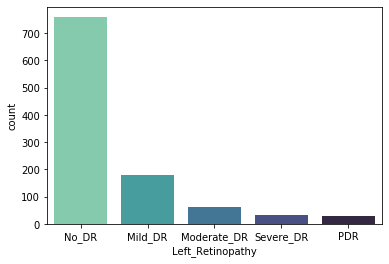

In [70]:
sns.countplot(x="Left_Retinopathy", data=df1,palette="mako_r", order = df1['Left_Retinopathy'].value_counts().index )
plt.show()

In [71]:
NoDR = len(df1[df1.Left_Retinopathy == 'No_DR'])
MildDR = len(df1[df1.Left_Retinopathy == 'Mild_DR'])
ModerateDR = len(df1[df1.Left_Retinopathy == 'Moderate_DR'])
SevereDR = len(df1[df1.Left_Retinopathy == 'Severe_DR'])
PDR = len(df1[df1.Left_Retinopathy == 'PDR'])


print("Percentage of patients who have No DR: {:.2f}%".format((NoDR / (len(df1.Left_Retinopathy))*100)))
print("Percentage of patients who have Mild DR: {:.2f}%".format((MildDR / (len(df1.Left_Retinopathy))*100)))
print("Percentage of patients who have Moderate DR: {:.2f}%".format((ModerateDR / (len(df1.Left_Retinopathy))*100)))
print("Percentage of patients who have Severe DR: {:.2f}%".format((SevereDR / (len(df1.Left_Retinopathy))*100)))
print("Percentage of patients who have  PDR: {:.2f}%".format((PDR / (len(df1.Left_Retinopathy))*100)))



Percentage of patients who have No DR: 71.47%
Percentage of patients who have Mild DR: 16.85%
Percentage of patients who have Moderate DR: 5.74%
Percentage of patients who have Severe DR: 3.20%
Percentage of patients who have  PDR: 2.73%


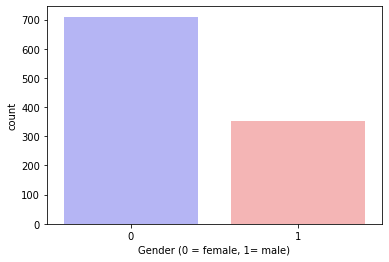

In [72]:
sns.countplot(x='Gender', data=df1, palette="bwr",order = df1['Gender'].value_counts().index )
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

In [73]:
countFemale = len(df1[df1.Gender == 0])
countMale = len(df1[df1.Gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df1.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df1.Gender))*100)))

Percentage of Female Patients: 66.85%
Percentage of Male Patients: 33.15%


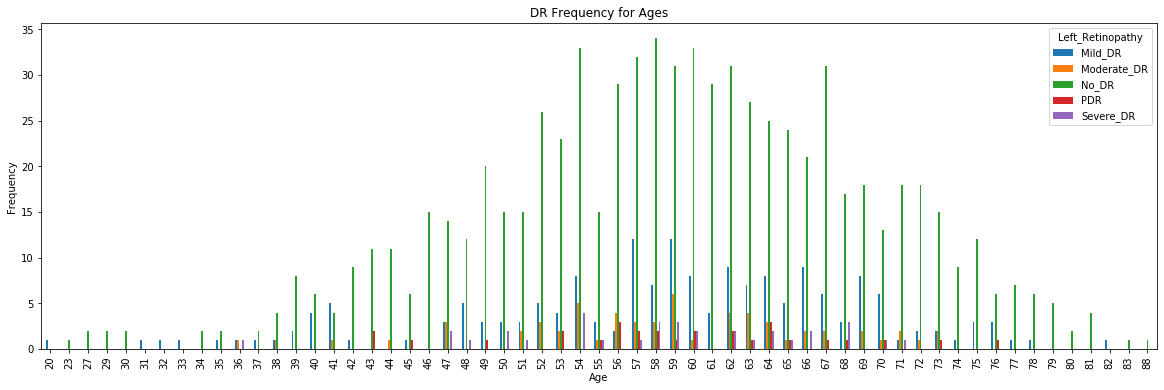

In [74]:
pd.crosstab(df1.Age,df1.Left_Retinopathy).plot(kind="bar",figsize=(20,6))
plt.title('DR Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('heartDiseaseAndAges.png')
plt.show()

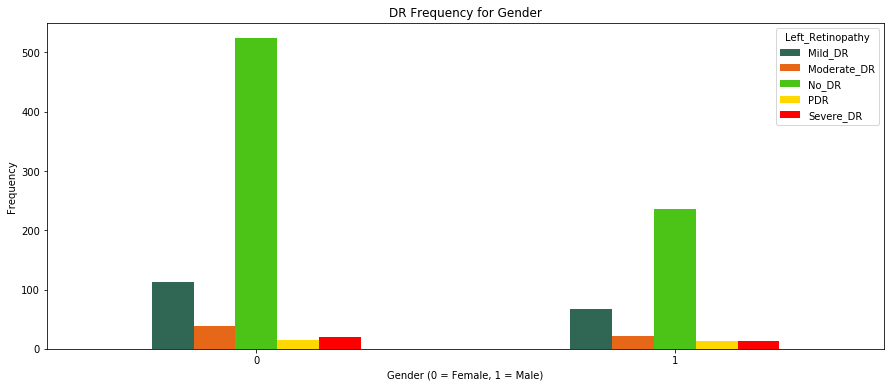

In [75]:
pd.crosstab(df1.Gender,df1.Left_Retinopathy).plot(kind="bar",figsize=(15,6),color=['#306754','#E56717','#4CC417','#FFD801','#FF0000'])
plt.title('DR Frequency for Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
#plt.legend(["No_DR", "Mild_DR", "Moderate_DR", "Severe_DR" ,"PDR"])
plt.ylabel('Frequency')
plt.show()



Text(0, 0.5, 'Maximum OD_VA Rate')

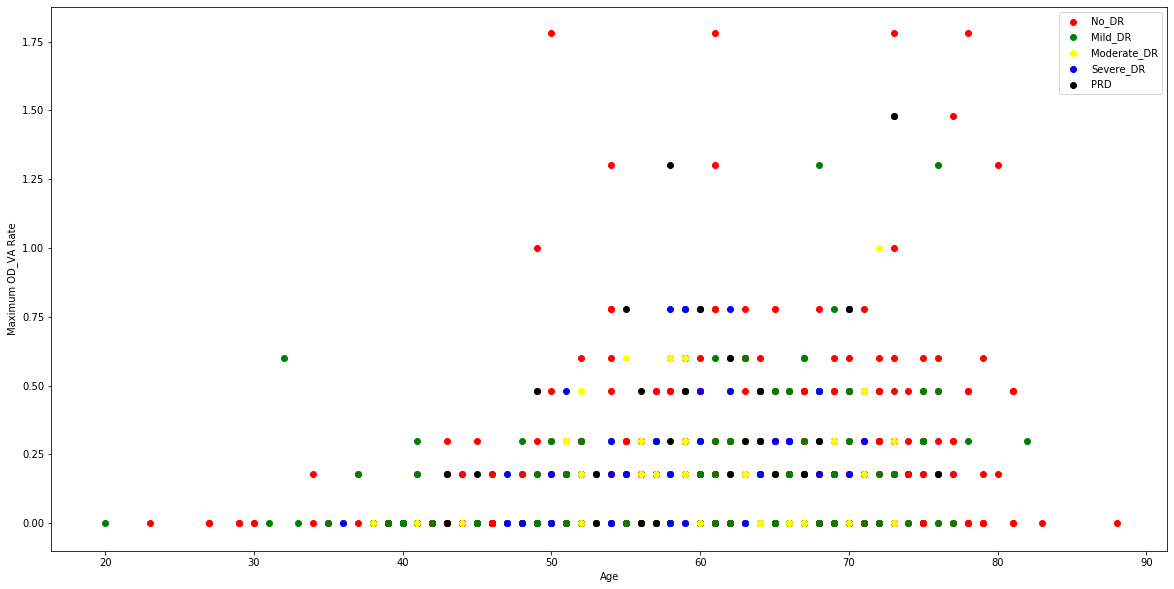

In [76]:
plt.figure(figsize=(20,10))

plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'No_DR'], y=df1.Right_VA[(df1.Left_Retinopathy=='No_DR')], c="red")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Mild_DR'], y=df1.Right_VA[(df1.Left_Retinopathy== 'Mild_DR')], c="green")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Moderate_DR'], y=df1.Right_VA[(df1.Left_Retinopathy== 'Moderate_DR')], c="yellow")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Severe_DR'], y=df1.Right_VA[(df1.Left_Retinopathy== 'Severe_DR')], c="blue")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'PDR'], y=df1.Right_VA[(df1.Left_Retinopathy== 'PDR')], c="black")


plt.legend(["No_DR", "Mild_DR","Moderate_DR","Severe_DR","PRD"])
plt.xlabel("Age")
plt.ylabel("Maximum OD_VA Rate")


Text(0, 0.5, 'Maximum OS_VA Rate')

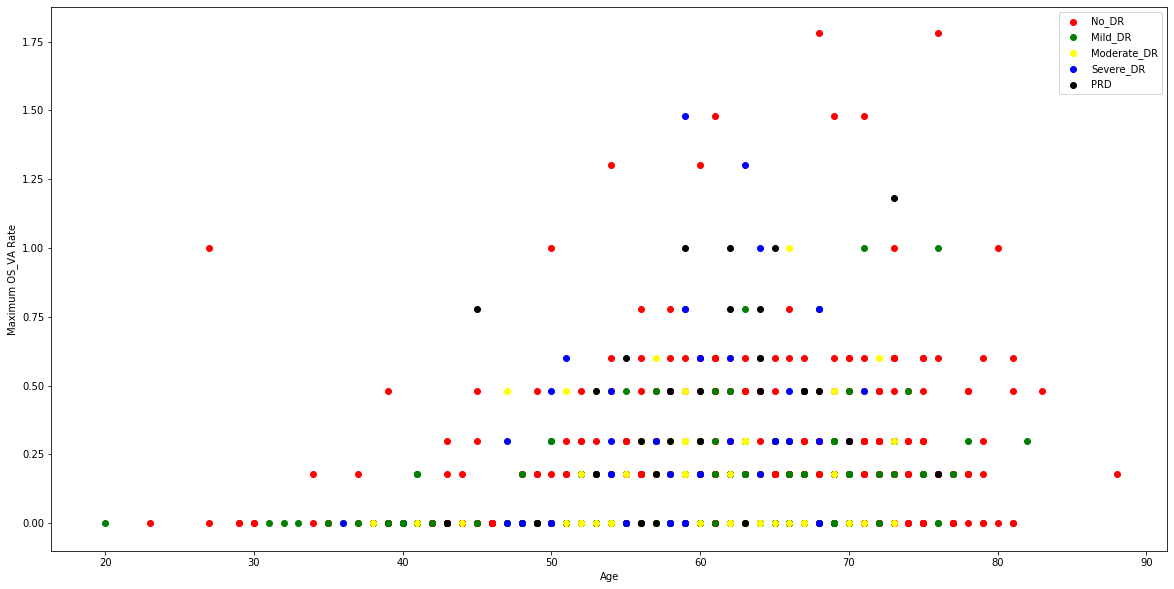

In [77]:
plt.figure(figsize=(20,10))

plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'No_DR'], y=df1.Left_VA[(df1.Left_Retinopathy=='No_DR')], c="red")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Mild_DR'], y=df1.Left_VA[(df1.Left_Retinopathy== 'Mild_DR')], c="green")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Moderate_DR'], y=df1.Left_VA[(df1.Left_Retinopathy== 'Moderate_DR')], c="yellow")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'Severe_DR'], y=df1.Left_VA[(df1.Left_Retinopathy== 'Severe_DR')], c="blue")
plt.scatter(x=df1.Age[df1.Left_Retinopathy== 'PDR'], y=df1.Left_VA[(df1.Left_Retinopathy== 'PDR')], c="black")


plt.legend(["No_DR", "Mild_DR","Moderate_DR","Severe_DR","PRD"])
plt.xlabel("Age")
plt.ylabel("Maximum OS_VA Rate")


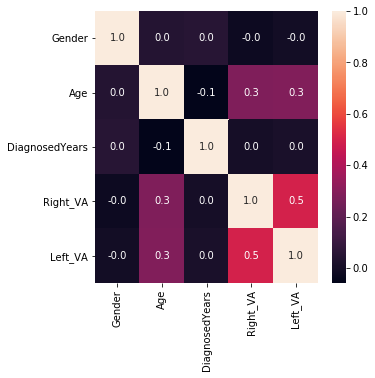

In [78]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df1[["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), annot=True,  fmt= '.1f',ax=ax)
plt.show()

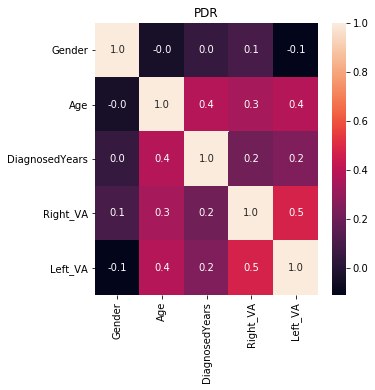

In [79]:
f,ax = plt.subplots(figsize=(5, 5))

ax = sns.heatmap(df1[df1['Left_Retinopathy']=='PDR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(),annot=True,  fmt= '.1f',ax = ax)
ax.set_title('PDR')

plt.show()

In [80]:
# Check the unique values in OS_VA
df1.Left_Retinopathy.unique()

array(['Moderate_DR', 'No_DR', 'PDR', 'Severe_DR', 'Mild_DR'],
      dtype=object)

Text(0.5, 1, 'PDR')

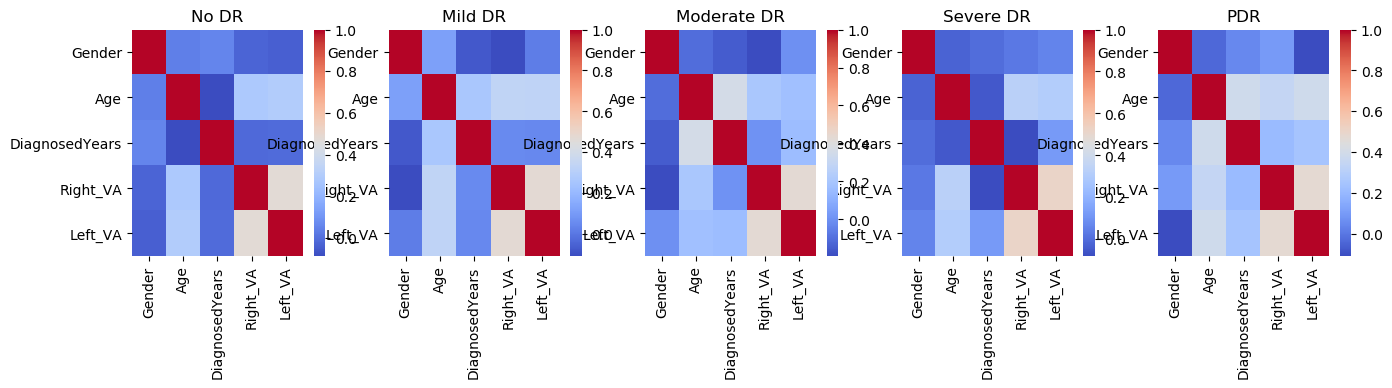

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(16, 3))
fig.set_dpi(100)
ax = sns.heatmap(df1[df1['Left_Retinopathy']=='No_DR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('No DR')

ax = sns.heatmap(df1[df1['Left_Retinopathy']=='Mild_DR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('Mild DR')

ax = sns.heatmap(df1[df1['Left_Retinopathy']=='Moderate_DR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), ax = axes[2], cmap='coolwarm')
ax.set_title('Moderate DR')

ax = sns.heatmap(df1[df1['Left_Retinopathy']=='Severe_DR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), ax = axes[3], cmap='coolwarm')
ax.set_title('Severe DR')

ax = sns.heatmap(df1[df1['Left_Retinopathy']=='PDR'][["Gender","Age","DiagnosedYears","Right_VA","Left_VA"]].corr(), ax = axes[4], cmap='coolwarm')
ax.set_title('PDR')

C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Equatorial coordinates')

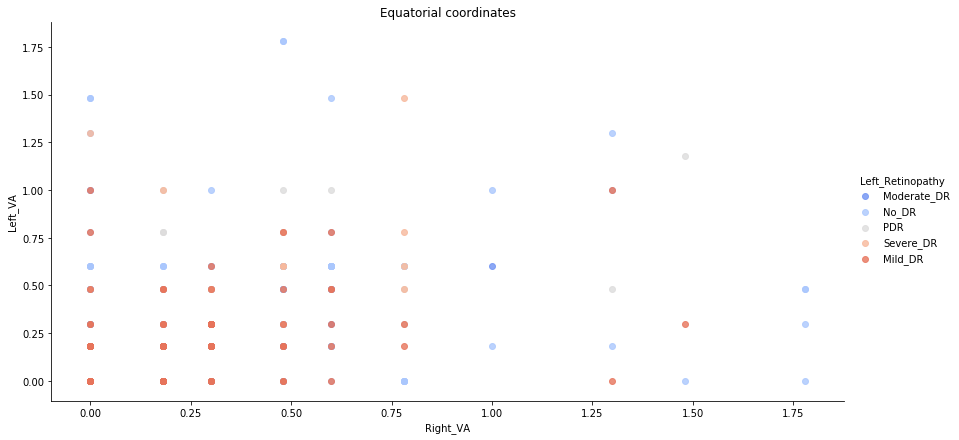

In [82]:
sns.lmplot(x='Right_VA', y='Left_VA', data=df1, hue='Left_Retinopathy', fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial coordinates')

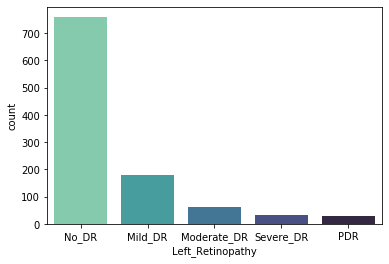

In [83]:
sns.countplot(x="Left_Retinopathy", data=df1,palette="mako_r", order = df1['Left_Retinopathy'].value_counts().index )
plt.show()

## Balancing data

In [84]:
df1.shape

(1062, 6)

In [85]:
df1.Left_Retinopathy.value_counts()

No_DR          759
Mild_DR        179
Moderate_DR     61
Severe_DR       34
PDR             29
Name: Left_Retinopathy, dtype: int64

In [86]:
from sklearn.utils import resample

In [87]:
# Separate majority and minority classes
NoDR = df1[df1.Left_Retinopathy == "No_DR"]
MildDR = df1[df1.Left_Retinopathy == "Mild_DR"]
ModerateDR = df1[df1.Left_Retinopathy == "Moderate_DR"]
SevereDR = df1[df1.Left_Retinopathy == "Severe_DR"]
PDR = df1[df1.Left_Retinopathy == "PDR"]


In [88]:
# Upsample no class
No_upsampled = resample(NoDR, 
                                 replace=True,     # sample with replacement
                                 n_samples=400    # to match majority class
                                 ) 

In [89]:
# Upsample mild class
MildDR_upsampled = resample(MildDR, 
                                 replace=True,     # sample with replacement
                                 n_samples=400    # to match majority class
                                 ) 

In [90]:
# Upsample ModerateDR class
ModerateDR_upsampled = resample(ModerateDR, 
                                 replace=True,     # sample with replacement
                                 n_samples=400    # to match majority class
                                 ) 

In [91]:
# Upsample SevereDR class
SevereDR_upsampled = resample(SevereDR, 
                                 replace=True,     # sample with replacement
                                 n_samples=400    # to match majority class
                                 ) 

In [92]:
# Upsample PDR class
PDR_upsampled = resample(PDR, 
                                 replace=True,     # sample with replacement
                                 n_samples=400    # to match majority class
                                 ) 

In [93]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([No_upsampled, MildDR_upsampled,ModerateDR_upsampled,SevereDR_upsampled,PDR_upsampled])

In [94]:
df4 = df_upsampled.sample(frac=1,replace = False, random_state= 42 )

In [95]:
 #Display new class counts
df4.Left_Retinopathy.value_counts()

Severe_DR      400
Mild_DR        400
Moderate_DR    400
PDR            400
No_DR          400
Name: Left_Retinopathy, dtype: int64

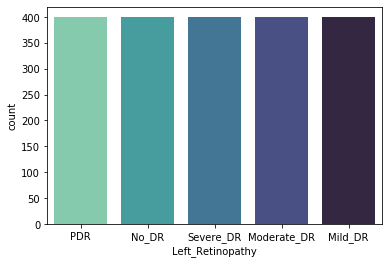

In [96]:
sns.countplot("Left_Retinopathy",data = df4,palette="mako_r")
plt.show()

In [97]:
df4 = df4.reset_index()

In [98]:
df4.head()

,index,Gender,Age,Right_VA,Left_VA,DiagnosedYears,Left_Retinopathy
0,843,1,73,1.48,1.18,16,PDR
1,437,0,61,0.00,0.18,4,No_DR
2,1502,0,58,0.18,0.18,6,Severe_DR
3,258,1,66,0.00,0.00,23,Moderate_DR
4,355,1,60,0.30,0.18,22,Severe_DR


In [99]:
# encode class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(df4['Left_Retinopathy'])
df4['Left_Retinopathy'] = y_encoded


In [100]:
df4.head()

,index,Gender,Age,Right_VA,Left_VA,DiagnosedYears,Left_Retinopathy
0,843,1,73,1.48,1.18,16,3
1,437,0,61,0.00,0.18,4,2
2,1502,0,58,0.18,0.18,6,4
3,258,1,66,0.00,0.00,23,1
4,355,1,60,0.30,0.18,22,4


In [101]:
df4 = df4.drop('index', axis=1)

In [102]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(df4.drop('Left_Retinopathy', axis=1))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(sdss, df4['Left_Retinopathy'], test_size=0.33)

In [104]:
df4.head()

,Gender,Age,Right_VA,Left_VA,DiagnosedYears,Left_Retinopathy
0,1,73,1.48,1.18,16,3
1,0,61,0.00,0.18,4,2
2,0,58,0.18,0.18,6,4
3,1,66,0.00,0.00,23,1
4,1,60,0.30,0.18,22,4


## K Nearest Neighbors

In [105]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 78.18
Time consumed for training: 0.004 seconds
Time consumed for prediction: 0.02448 seconds


## Naive Bayes

In [106]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df4.drop('Left_Retinopathy', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, df4['Left_Retinopathy'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 34.55
Time consumed for training: 0.001 seconds
Time consumed for prediction: 0.00037 seconds


## XGBoost

In [107]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 89.85
Time consumed for training: 0.974
Time consumed for prediction: 0.00535 seconds


## Scitkit-Learn's Random Forest Classifier

In [108]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 91.36
Time consumed for training: 0.021 seconds
Time consumed for prediction: 0.00247 seconds


## Support Vector Machine Classifier

In [109]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 38.64
Time consumed for training: 0.070 seconds
Time consumed for prediction: 0.01548 seconds


C:\Users\saral\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [110]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Accuracy': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df


,Accuracy,Runtime Training,Runtime Prediction
Model,,,
Random Forest,91.363636,0.021460,0.002467
XGBoost,89.848485,0.973916,0.005352
KNN,78.181818,0.004182,0.024484
SVC,38.636364,0.070096,0.015483
Naive Bayes,34.545455,0.000995,0.000373


# K Fold Cross Validation

## Scikit-Learn's Random Forest Classifier

In [111]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.875      0.875      0.90441176 0.89552239 0.87313433 0.91044776
 0.92537313 0.91666667 0.86363636 0.90151515]
Mean: 0.8940707558464362
Standard Deviation: 0.020037606638612347


## XGBoost

In [112]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86029412 0.88235294 0.91911765 0.8880597  0.91044776 0.91791045
 0.91791045 0.90909091 0.87121212 0.90909091]
Mean: 0.8985487003485246
Standard Deviation: 0.02029710186839586


XGBoost showed a higher mean and lower standard deviation than the Scikit-Learn RFC. A high mean corresponds to a more stable performance and a low standard deviation corresponds to smaller range of results.

In [113]:
import pickle
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

### save model to file

In [114]:
#pickle.dump(xgb, open("xgbModel_V1.pkl", "wb"))

In [115]:

pickle.dump(rfc, open("Random_Left.pkl", "wb"))

### load model from file

In [116]:
#loaded_model = pickle.load(open("xgbModel_V1.pkl", "rb"))

In [117]:
loaded_model = pickle.load(open("Random_Left.pkl", "rb"))

In [118]:
# make predictions for test data
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [119]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.36%


In [120]:
model= pickle.load(open('Random_Left.pkl','rb'))
print(model.predict([[0,64,0.48,0.78,25]]))

[1]


In [121]:
data_df= pd.read_csv(r'test.csv')
data_df

,Gender,Age,Right_VA,Left_VA,HowLong
0,0,60,0.00,0.18,11
1,0,45,0.60,0.18,13
2,0,52,0.18,0.00,16
3,1,65,0.18,0.30,14
4,1,63,0.30,0.60,5
5,1,59,0.60,0.60,7


In [122]:
model= pickle.load(open('Random_Left.pkl','rb'))

In [123]:
y_pred = rfc.predict(X_test)

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[104   3  15   0   5]
 [  0 143   0   0   0]
 [ 22   5  93   4   3]
 [  0   0   0 123   0]
 [  0   0   0   0 140]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       127
           1       0.95      1.00      0.97       143
           2       0.86      0.73      0.79       127
           3       0.97      1.00      0.98       123
           4       0.95      1.00      0.97       140

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

0.9136363636363637


In [125]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,normalize=False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[140   0   0   0   0]
 [  0 123   0   0   0]
 [  3   4  93   5  22]
 [  0   0   0 143   0]
 [  5   0  15   3 104]]


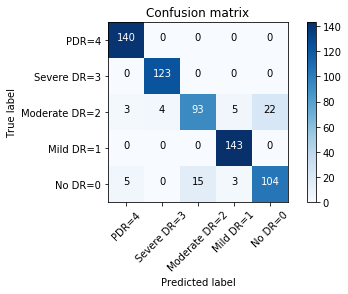

In [126]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[4,3,2,1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PDR=4','Severe DR=3','Moderate DR=2','Mild DR=1','No DR=0' ],normalize= False,  title='Confusion matrix')

In [127]:
y_pred = xgb.predict(X_test)

In [128]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 97   5  23   0   2]
 [  0 143   0   0   0]
 [ 27   7  90   3   0]
 [  0   0   0 123   0]
 [  0   0   0   0 140]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       127
           1       0.92      1.00      0.96       143
           2       0.80      0.71      0.75       127
           3       0.98      1.00      0.99       123
           4       0.99      1.00      0.99       140

    accuracy                           0.90       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.90      0.90       660

0.8984848484848484


In [129]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,normalize=False, title= 'Confusion Matrix', cmap= plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[140   0   0   0   0]
 [  0 123   0   0   0]
 [  0   3  90   7  27]
 [  0   0   0 143   0]
 [  2   0  23   5  97]]


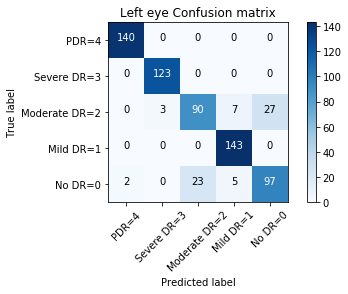

In [134]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[4,3,2,1,0])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PDR=4','Severe DR=3','Moderate DR=2','Mild DR=1','No DR=0' ],normalize= False,  title='Left eye Confusion matrix')

### Test The Model

In [131]:
def predict():
    predict_df= data_df.filter(['Gender','Age','Right_VA', 'Left_VA','HowLong'])
    predict= model.predict(predict_df)
    output= pd.DataFrame({'Gender':predict_df.Gender,
                          'Age':predict_df.Age,
                          'Right_VA':predict_df.Right_VA,
                          'Left_VA':predict_df.Left_VA,
                          'HowLong':predict_df.HowLong,
                         'Prediction_Class': predict})
    return output.to_csv('predicted_Left.csv',index= False)


In [132]:
predict()

In [133]:
predicted_df= pd.read_csv(r'predicted_Left.csv')
predicted_df

,Gender,Age,Right_VA,Left_VA,HowLong,Prediction_Class
0,0,60,0.00,0.18,11,2
1,0,45,0.60,0.18,13,0
2,0,52,0.18,0.00,16,0
3,1,65,0.18,0.30,14,2
4,1,63,0.30,0.60,5,4
5,1,59,0.60,0.60,7,4
